# Ejercicios de ilustración método de transformada inversa y aceptación y rechazo

In [34]:
# Importamos librerías a trabajar en todas las simulaciones
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle  # Librería para hacer ciclos
import scipy.stats as st     # Librería estadística
from math import factorial as fac # Importo la operación factorial

%matplotlib inline

In [28]:
dist = 'beta'
param = {'a': 1, 'b': 2}
getattr(st, dist)(**param).ppf(.3)
# st.beta(**param).ppf(.1)

0.16333997346592444

### Ilustración método de la transformada inversa con paquete `stats`

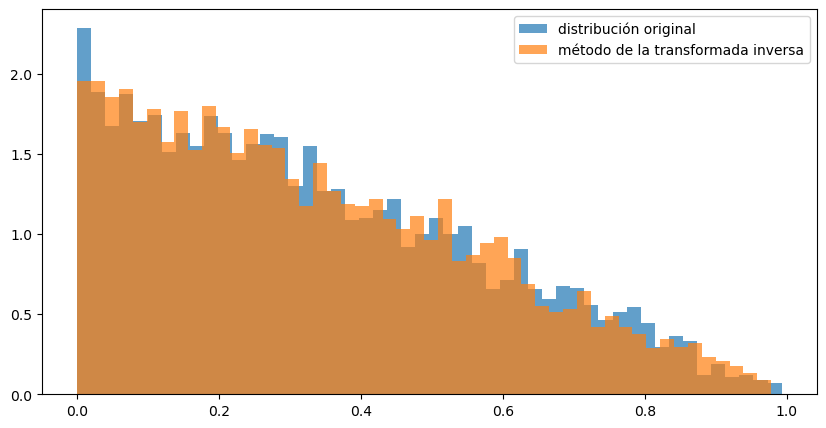

In [29]:
# Elegir la distribución
name_dist = 'beta'
# Explorar la función de la función getattr
dist = getattr(st, name_dist)
# Parametros de la distribución (tupla)
params = {'a': 1, 'b': 2}
# Cantidad de términos
N = 5000

x = dist(**params).rvs(N)

# Comparación de histogramas
# 1. Histograma distribución original
plt.figure(figsize=[10,5])
plt.hist(x, bins=50, density=True, label='distribución original', alpha=0.7);

# 2. Implementación del método de la transformada inversa usando función 'ppf'
U = np.random.rand(N)

# Generación de variable aleatorias de la distrubición elegida
f_inv = dist(**params).ppf(U)
plt.hist(f_inv, bins=50, density=True, label='método de la transformada inversa',  alpha=0.7);
plt.legend()

## <font color ='red'> **Ejercicio 2** 
 1. Generación variable aleatoria continua

$$
h(x)=
\begin{cases}
0, & x<0 \\
x, & 0 \le x < 1 \\
2-x, & 1\le x \le 2 \\
0,& x>1
\end{cases}
$$

Genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 100 muestras generadas con el método y compárela con el función $h(x)$ dada, esto con el fín de validar que el procedimiento fue realizado de manera correcta

### Método de la transformada inversa

(array([5., 2., 1., 1., 1., 0., 0., 0., 0.]),
 array([0.        , 0.4472136 , 0.63245553, 0.77459667, 0.89442719,
        1.        , 1.10557281, 1.22540333, 1.36754447, 1.5527864 ]),
 <BarContainer object of 9 artists>)

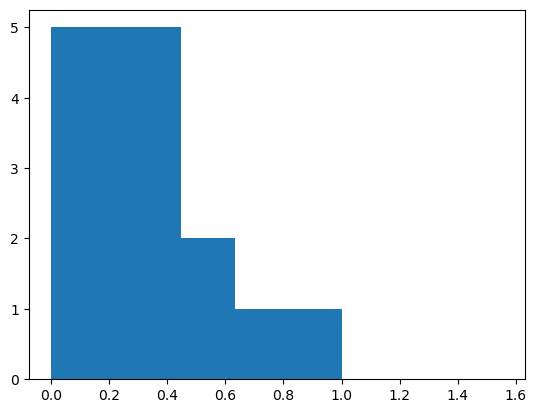

In [42]:
H_inv = lambda u: np.sqrt(2 * u) if 0 <= u < 1/2 else 2 - np.sqrt(-2*u + 2)
H_inv = np.vectorize(H_inv, otypes=[float])

x = np.arange(0, 1, 0.1)
plt.hist(x, H_inv(x))

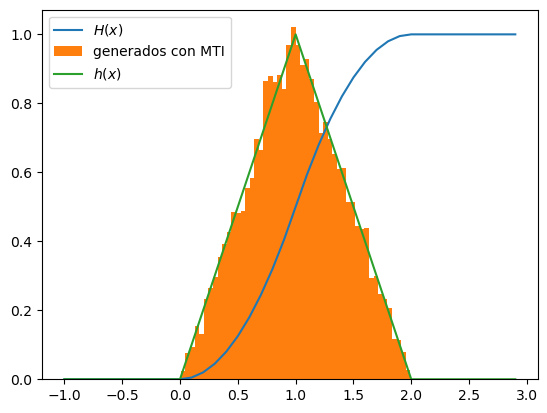

In [47]:
# Crear función acumulada
H = lambda x: 0 if x < 0 else (x**2/2 if 0<= x < 1 else (2 * x - x**2/2 - 1 if 1<= x <= 2 else 1))
H = np.vectorize(H, otypes=[float])

# Graficar función acumulada
x = np.arange(-1, 3, 0.1)
plt.plot(x, H(x), label='$H(x)$')

# Crear función inversa
H_inv = lambda u: np.sqrt(2 * u) if 0 <= u < 1/2 else 2 - np.sqrt(-2*u + 2)
H_inv = np.vectorize(H_inv, otypes=[float])

# Validar función inversa (gráfica)

# Vector de aleatorios uniformer
N = 10000
U = np.random.rand(N)

# Vector generado con MTI
x_rand = H_inv(U)

# Graficar histograma aleatorios
plt.hist(x_rand, bins=50, density=True, label='generados con MTI')

# Función de densidad h(x)
# PDF
h = lambda x: 0 if x < 0 else (x if 0<= x < 1 else (2 - x if 1<= x <= 2 else 0))
h = np.vectorize(h, otypes=[float])

# Graficar función de densidad h(x)
plt.plot(x, h(x), label='$h(x)$')
plt.legend();

### Método de aceptación y rechazo

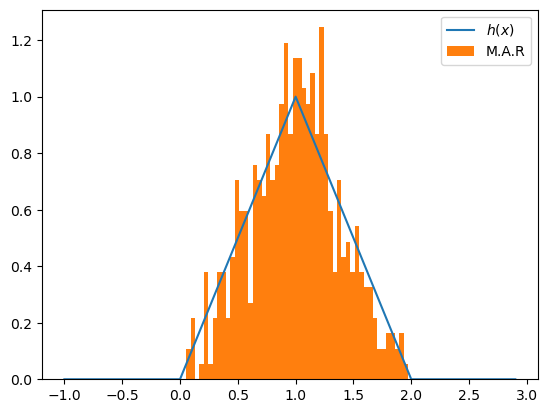

In [52]:
N = 1000

# Graficar densidad de probabilidad h(x)
h = lambda x: 0 if x < 0 else (x if 0<= x < 1 else (2 - x if 1<= x <= 2 else 0))
h = np.vectorize(h, otypes=[float])

# Graficar función de densidad h(x)
plt.plot(x, h(x), label='$h(x)$')
plt.legend();

# Programar método de aceptación y rechazo
t = lambda x: np.ones(len(x))
R1 = np.random.uniform(0, 2, N)
R2 = np.random.rand(N)

condicion = h(R1) >= t(R1) * R2

aceptados = R1[condicion]

# Graficar puntos aceptados
plt.hist(aceptados, bins=50, density=True, label='M.A.R')
plt.legend()
# Almacenar números aceptados en una variable y graficar su histograma


## Ejercicio 3
Suponga que tiene la siguiente probability mass function 
$$
P(X=k) = 
\begin{cases} 
\frac{1}{3}\left( \frac{2}{3}\right)^{k-1}, & \text{si } k=1, 2, \cdots \\
0, & \text{otro caso}
\end{cases}
$$

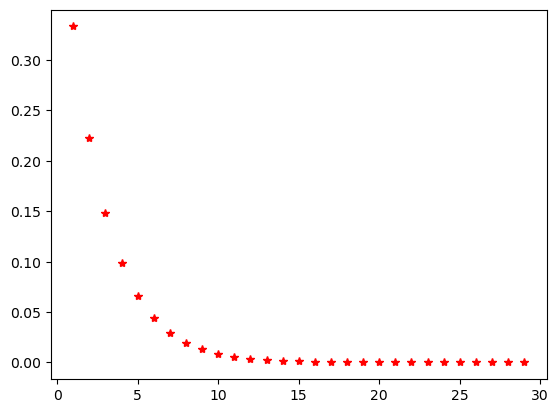

In [54]:
N = 700
# PMF p(x)
p = lambda k: (1 / 3) * (2 / 3) ** (k-1) 

# Gráfica de pmf
k = np.arange(1, 30)
plt.plot(k, p(k), 'r*')

# Método de aceptación rechazo discreto
max_p = p(1)


In [66]:
y, x = np.histogram(aceptados, bins=len(set(aceptados)), density=True)
x = x[1:]
y.shape, x.shape 

((20,), (20,))

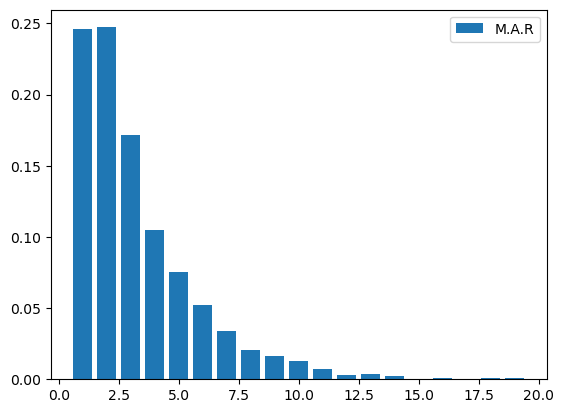

In [67]:
t = lambda x: max_p * np.ones(len(x))
N = 20000
# PMF p(x)
p = lambda k: (1 / 3) * (2 / 3) ** (k-1) 

R1 = np.random.randint(0, 30, N)
R2 = np.random.rand(N)

condicion = p(R1) >= t(R1) * R2

aceptados = R1[condicion]

# Graficar puntos aceptados
y, x = np.histogram(aceptados, bins=len(set(aceptados)), density=True)
x = x[1:]

plt.bar(x, y, label='M.A.R')
plt.legend()